# CoreMS Assignments to Angus Alcoseal 106004E

`CoreMS` framework for mass spectrum


### 1. Import Data File


In [1]:
from pathlib import Path

data_dir = Path.cwd() / "data" / "user_data"
print(data_dir)

/home/corems/data/user_data


In [2]:
filepaths = list(data_dir.iterdir())
for idx, filepath in enumerate(filepaths):
    print(f"{idx}: {filepath}")

0: /home/corems/data/user_data/1p5_NegESI_SRFA_AfterSW28_sum50_ABS_3sigma.pks
1: /home/corems/data/user_data/2020September23NegESI_PFAS_AFFF_1_10000_sum250_Rephased.pks
2: /home/corems/data/user_data/2020September23PosESI_PFAS_AFFF_1_10000_sum250_Rephased.pks
3: /home/corems/data/user_data/2021May20_SRFA_Sum568_6p3s_1E6_3sigma_101221.pks
4: /home/corems/data/user_data/2023July28_NegESI_Guardian_AFFFC_wSRFA_4s_3E6_sum150_3sigma.pks
5: /home/corems/data/user_data/2023July28_NegESI_Guardian_AFFFC_wSRFA_4s_8E5_sum150_3sigma.pks
6: /home/corems/data/user_data/2023July28_NegESI_Jacobs3M_AFFF_wSRFA_4s_8E5_sum100_3sigma.pks
7: /home/corems/data/user_data/2023July28_NegESI_PetersonBucket_AFFF_wSRFA_4s_3E6_sum100_3sigma.pks
8: /home/corems/data/user_data/2024March21_NegESI_Angus_Alcoseal_106004E_sum250_3sigma.pks
9: /home/corems/data/user_data/2024March21_NegESI_Angus_Alcoseal_1060_24_sum250_3sigma.pks
10: /home/corems/data/user_data/2024March21_NegESI_Angus_Alcoseal_1061_01_02_sum250_3sigma.pks

### 2. Import Centroid Mass List Files

See [MS_file_imports.md](/home/corems/docs/user_guide/MS_file_imports.md) for details on the class methods, parameters and settings used for mass list file imports.

#### .pks Files

`.pks` files are .txt files exported from Predator Analysis software in a custom format. When the .pks file extension is detected, this format is used for importing the mass spectral data with user-specified `MassSpectrumSetting`s.

In the following example, the noise threshold method is `"signal_noise"`, and the minimum is set to `6` (default=6). The m/z range is also set explicitly.

Filtering based on noise threshold and mz range occur when `auto_process=True`. Settings are read from a JSON or other file when `loadSettings=True`. Currently, this feature is not fully implemented.

The total number of peaks (92,307) is illustrated with `len(mass_spectrum)`.

In [4]:
# Imports
from corems.encapsulation.factory.parameters import MSParameters
from corems.mass_spectrum.input.massList import ReadMassList

# Choose noise threshold method and minimum value
MSParameters.mass_spectrum.noise_threshold_method = "signal_noise"
MSParameters.mass_spectrum.noise_threshold_min_s2n = 4

# Set m/z range for peak picking and noise threshold
MSParameters.mass_spectrum.noise_min_mz = 50.0
MSParameters.mass_spectrum.noise_max_mz = 1500.0
MSParameters.mass_spectrum.min_picking_mz = 50.0
MSParameters.mass_spectrum.max_picking_mz = 1500.0

# Set Kendrick base
kb = {"C": 2, "H": 4, "O": 1}
MSParameters.ms_peak.kendrick_base = kb

# Specify file path
file_location = filepaths[8]
print(f"file locations: {file_location}")

file locations: /home/corems/data/user_data/2024March21_NegESI_Angus_Alcoseal_106004E_sum250_3sigma.pks


42089
Mass spectrum label: CoreMS_Centroid
Baseline noise: 0.0010011876484560575
Baseline noise std: 3.444180522565318e-05
Is centroid: True


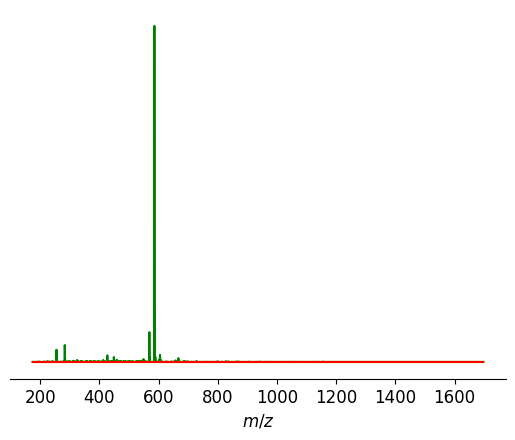

In [5]:
mass_list_reader = ReadMassList(file_location)

# Import centroided spectrum
mass_spectrum = mass_list_reader.get_mass_spectrum(
    polarity=-1, auto_process=True, loadSettings=False
)
print(len(mass_spectrum))

# Debug information to understand the issue
print(f"Mass spectrum label: {mass_spectrum.label}")
print(f"Baseline noise: {mass_spectrum.baseline_noise}")
print(f"Baseline noise std: {mass_spectrum.baseline_noise_std}")
print(f"Is centroid: {mass_spectrum.is_centroid}")

# Check if noise threshold values exist before plotting
if mass_spectrum.baseline_noise is not None and mass_spectrum.baseline_noise_std is not None:
    # Plot the mass spectrum
    mass_spectrum.plot_profile_and_noise_threshold()
else:
    print("Noise threshold not calculated. Calculating manually...")
    mass_spectrum.cal_noise_threshold()
    print(f"After manual calculation - Baseline noise: {mass_spectrum.baseline_noise}")
    print(f"After manual calculation - Baseline noise std: {mass_spectrum.baseline_noise_std}")
    # Now try plotting
    mass_spectrum.plot_profile_and_noise_threshold()

### 3. Access mass spectrum peak objects


In [6]:
n = 20
most_abundant_peaks = mass_spectrum.sort_by_abundance(reverse=True)[:n]

print(f"Most abundant peaks (top {n}):")
for i, mspeak in enumerate(most_abundant_peaks):
    print(
        f"{i+1}: {mspeak.mz_exp:.6f} m/z | "
        f"{mspeak.abundance:.4f} abundance | " 
        f"{mspeak.resolving_power:.1f} resolving power | " 
        f"{mspeak.signal_to_noise:.1f} S/N | "
        f"{mspeak.kmd:.4f} KMD" 
    )

Most abundant peaks (top 20):
1: 586.039874 m/z | 100.0000 abundance | 1572095.0 resolving power | 423724.2 S/N | -0.6909 KMD
2: 587.043248 m/z | 14.9640 abundance | 1453904.0 resolving power | 63405.4 S/N | -0.6937 KMD
3: 569.078744 m/z | 8.8490 abundance | 1587934.0 resolving power | 37494.0 S/N | -0.7399 KMD
4: 588.035709 m/z | 8.7130 abundance | 1578427.0 resolving power | 36918.5 S/N | -0.6856 KMD
5: 283.264254 m/z | 5.0150 abundance | 3005431.0 resolving power | 21247.6 S/N | -0.0956 KMD
6: 586.024439 m/z | 4.9020 abundance | 109919.0 resolving power | 20770.9 S/N | -0.6755 KMD
7: 586.034054 m/z | 4.0640 abundance | 129567.0 resolving power | 17217.6 S/N | -0.6851 KMD
8: 586.044572 m/z | 3.9150 abundance | 119843.0 resolving power | 16588.1 S/N | -0.6956 KMD
9: 255.232841 m/z | 3.6210 abundance | 3490357.0 resolving power | 15343.4 S/N | -0.0809 KMD
10: 586.053633 m/z | 3.4340 abundance | 116299.0 resolving power | 14551.7 S/N | -0.7047 KMD
11: 586.014517 m/z | 2.1760 abundance |

In [7]:
print(f"Kendrick base: {mass_spectrum.mspeaks_settings.kendrick_base}")


Kendrick base: {'C': 2, 'H': 4, 'O': 1}


### 4. Molecular formula search
The formula database isn't built until the `SearchMolecularFormulas` method is run.

See [database_initialization.md](/home/corems/docs/user_guide/database_initialization.md) and [molecular_formula_search.md](/home/corems/docs/user_guide/molecular_formula_search.md) for details about the molecular formula database and search process. Both database initialization and molecular formula searching rely establishing the relevant heteroatom space.

Numerous parameters can be set to facilitate the molecular search process, including element number and element ratio constraints, and ppm and isotope abundance error constraints. Many of these constraints are illustrated below. In the following example, `first_hit = False`, meaning that peaks aren't skipped when a molecular formula has already been assigned.

In [8]:
from corems.molecular_id.search.molecularFormulaSearch import SearchMolecularFormulas

# Ion Types
mass_spectrum.molecular_search_settings.isProtonated = True
mass_spectrum.molecular_search_settings.isRadical = False
mass_spectrum.molecular_search_settings.isAdduct = False

# Atom constraints
mass_spectrum.molecular_search_settings.usedAtoms["C"] = (1, 100)
mass_spectrum.molecular_search_settings.usedAtoms["H"] = (4, 200)   # Max H for C100 is 202
mass_spectrum.molecular_search_settings.usedAtoms["N"] = (0, 4)
mass_spectrum.molecular_search_settings.usedAtoms["O"] = (1, 30)
# mass_spectrum.molecular_search_settings.usedAtoms["P"] = (0, 1)
mass_spectrum.molecular_search_settings.usedAtoms["S"] = (0, 2)

# Mass error constraints
mass_spectrum.molecular_search_settings.error_method = "None"
mass_spectrum.molecular_search_settings.min_ppm_error = -0.2   # Bahureksa paper 0.4
mass_spectrum.molecular_search_settings.max_ppm_error = 0.2

# DBE constraints - Can always throw out high Mod AI (> 0.5 = aromatic and > 0.67 = condensed aromatic)
mass_spectrum.molecular_search_settings.min_dbe = 0
mass_spectrum.molecular_search_settings.max_dbe = 66   # Max DBE 66 for C100 (empirical Max DBE = 2C/3)

# H/C ratio constraints (Kind & Fiehn)
mass_spectrum.molecular_search_settings.min_hc_filter = 0.2
mass_spectrum.molecular_search_settings.max_hc_filter = 3.1

# O/C ratio constraints (Kind & Fiehn)
mass_spectrum.molecular_search_settings.min_oc_filter = 0
mass_spectrum.molecular_search_settings.max_oc_filter = 1.2

# O/P ratio constraints
# mass_spectrum.molecular_search_settings.min_op_filter = 2

# Isotope abundance constraints
mass_spectrum.molecular_search_settings.min_abun_error = -15
mass_spectrum.molecular_search_settings.max_abun_error = 15


SearchMolecularFormulas(mass_spectrum, first_hit=True).run_worker_mass_spectrum()
mass_spectrum.percentile_assigned(report_error=True)


'runworker'  564.06 ms


Loading molecular formula database: 845742it [01:09, 12138.64it/s]
Started molecular formula search for class {"N": 3, "S": 2, "O": 10}, (de)protonated : 100%|██████████| 300/300 [01:20<00:00,  3.73it/s]
Loading molecular formula database: 389146it [00:32, 12030.70it/s]
Started molecular formula search for class {"N": 4, "S": 2, "O": 30}, (de)protonated : 100%|██████████| 150/150 [00:29<00:00,  5.01it/s]


'run_molecular_formula'  214814.44 ms
11347 assigned peaks and 30742 unassigned peaks, total  = 26.96 %, relative abundance = 25.73 %, RMS error (best candidate) (ppm) = 0.097


(11347, 30742, 26.95953812159947, 25.729966261350732, 0.09748068894905629)

### 5. Visualizing Results

The tools for exploring and visualizing molecular formula assignment results are primarily contained in `HeteroatomsClassification`, consistent with the use of heteroatom space to define search space.

<Axes: xlabel='$\t{m/z}$', ylabel='Abundance'>

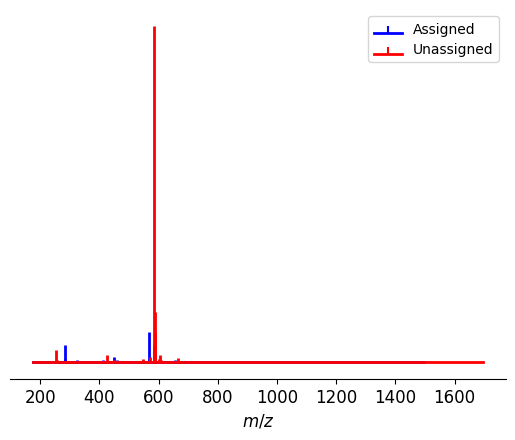

In [9]:
from corems.molecular_id.factory.classification import HeteroatomsClassification

mass_spectrum_by_classes = HeteroatomsClassification(
    mass_spectrum, choose_molecular_formula=True
)
mass_spectrum_by_classes.plot_ms_assigned_unassigned()

### 6. Exploring Mass Spectrum

In [10]:
for mspeaks in mass_spectrum.sort_by_abundance()[-20:]:
    for mf in mspeaks:
        print(f"Abundance: {mspeaks.abundance:.2f} | "
              f"m/z: {mf.mz_calc:.6f} | "
              f"Error: {mf.mz_error:.6f} | "
              f"DBE: {mf.dbe} | "
              f"H/C: {mf.H_C:.6f} | "
              f"O/C: {mf.O_C:.6f} | "
              f"AI mod: {mf.A_I_mod:.6f} | "
              f"KMD: {mf.kmd:.4f} | "
              f"Class: {mf.class_label} | "
              f"Formula: {mf.string_formated}")

Abundance: 1.47 | m/z: 449.173661 | Error: -0.008430 | DBE: 1.0 | H/C: 2.307692 | O/C: 1.000000 | AI mod: 0.000000 | KMD: -0.9062 | Class: N4 O13 | Formula: C₁₃H₃₀O₁₃N₄
Abundance: 2.18 | m/z: 586.014443 | Error: 0.127118 | DBE: 14.0 | H/C: 0.809524 | O/C: 0.809524 | AI mod: 0.333333 | KMD: -0.6655 | Class: N1 S1 O17 | Formula: C₂₁H₁₇O₁₇N₁S₁
Abundance: 3.43 | m/z: 586.053687 | Error: -0.091725 | DBE: 26.0 | H/C: 0.531250 | O/C: 0.156250 | AI mod: 0.755102 | KMD: -0.7047 | Class: N3 S2 O5 | Formula: C₃₂H₁₇O₅N₃S₂
Abundance: 5.01 | m/z: 283.264254 | Error: -0.000166 | DBE: 1.0 | H/C: 2.000000 | O/C: 0.111111 | AI mod: 0.000000 | KMD: -0.0956 | Class: O2 | Formula: C₁₈H₃₆O₂
Abundance: 8.85 | m/z: 569.078779 | Error: -0.060985 | DBE: 30.0 | H/C: 0.486486 | O/C: 0.027027 | AI mod: 0.784615 | KMD: -0.7399 | Class: N2 S2 O1 | Formula: C₃₇H₁₈O₁N₂S₂


### 7. Exporting Molecular Formula Results

In [11]:
# exporting data
base_dir = Path("/home/corems/data")
exports_dir = base_dir / "exports"

# Create output paths for different formats
csv_file = exports_dir / "Angus_Alcoseal_106004E_CoreMS.csv"

# Save in different formats
mass_spectrum.to_csv(str(csv_file))

# get pandas Dataframe
df = mass_spectrum.to_dataframe()
df.head()

,Index,m/z,Calibrated m/z,Calculated m/z,Peak Height,Peak Area,Resolving Power,S/N,Ion Charge,m/z Error (ppm),...,H,O,N,S,13C,15N,17O,18O,33S,34S
0,202,176.071733,176.071733,176.071702,0.001,NaN,3663517.0,4.588,-1,0.174669,...,11.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,204,176.092864,176.092864,176.092832,0.016,NaN,5359051.0,66.391,-1,0.185051,...,15.0,4.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,306,177.022733,177.022733,177.022704,0.002,NaN,4516973.0,6.951,-1,0.169342,...,10.0,4.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
3,566,179.046240,179.046240,179.046216,0.001,NaN,4125291.0,5.089,-1,0.134752,...,8.0,3.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,567,179.056135,179.056135,179.056112,0.002,NaN,5057056.0,9.403,-1,0.130396,...,12.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


`mass_spectrum.to_csv` and `mass_spectrum.to_dataframe` produce tables with the following columns.

In [12]:
for col in df.columns:
    print(col)

Index
m/z
Calibrated m/z
Calculated m/z
Peak Height
Peak Area
Resolving Power
S/N
Ion Charge
m/z Error (ppm)
m/z Error Score
Isotopologue Similarity
Confidence Score
DBE
O/C
H/C
Heteroatom Class
Ion Type
Adduct
Is Isotopologue
Mono Isotopic Index
Molecular Formula
KMD
Formula KMD
C
H
O
N
S
13C
15N
17O
18O
33S
34S
